<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/Long_Distance_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Short Distance**

In [3]:
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

#### **Auto Regressor ANN Model**

In [4]:
i = tf.keras.layers.Input(shape=(T,))
x = tf.keras.layers.Dense(1,activation = 'sigmoid')(i)
model = tf.keras.Model(i,x)

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(
    X,Y,
    epochs = 80,
    validation_split = 0.5
)

Epoch 1/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4944 - loss: 0.8818 - val_accuracy: 0.4932 - val_loss: 0.7152
Epoch 2/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5114 - loss: 0.7014 - val_accuracy: 0.5100 - val_loss: 0.6949
Epoch 3/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5070 - loss: 0.6952 - val_accuracy: 0.4904 - val_loss: 0.6963
Epoch 4/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5190 - loss: 0.6935 - val_accuracy: 0.5004 - val_loss: 0.6963
Epoch 5/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5080 - loss: 0.6929 - val_accuracy: 0.4968 - val_loss: 0.6966
Epoch 6/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4980 - loss: 0.6959 - val_accuracy: 0.4972 - val_loss: 0.6961
Epoch 7/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5129 - loss: 0.6937 - val_accuracy: 0.5004 - val_loss: 0.6967
Epoch 8/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5156 - loss: 0.6940 - val_accuracy: 0.5092 - val_lo

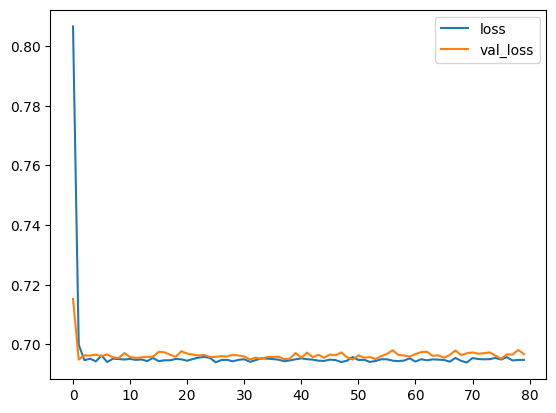

In [5]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

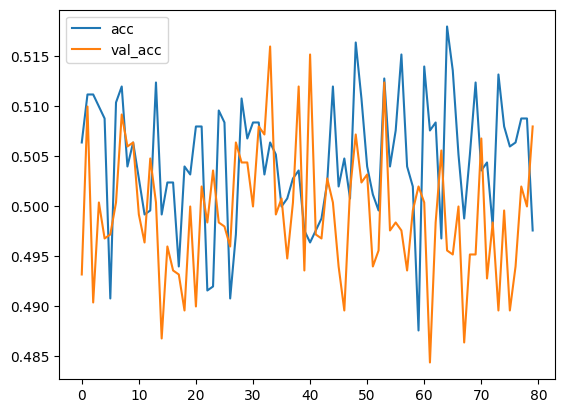

In [6]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#### **Simple RNN**

In [8]:
input = np.expand_dims(X,-1)

i = tf.keras.layers.Input(shape=(T,D))
x = tf.keras.layers.SimpleRNN(5)(i)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(i , x)

model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

r = model.fit(
    input,Y,
    epochs = 200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5700 - loss: 0.6910 - val_accuracy: 0.6488 - val_loss: 0.6454
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6724 - loss: 0.6356 - val_accuracy: 0.7248 - val_loss: 0.5903
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7521 - loss: 0.5803 - val_accuracy: 0.7440 - val_loss: 0.5481
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7455 - loss: 0.5479 - val_accuracy: 0.7660 - val_loss: 0.5257
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7771 - loss: 0.5186 - val_accuracy: 0.7644 - val_loss: 0.5008
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7816 - loss: 0.4949 - val_accuracy: 0.7780 - val_loss: 0.4811
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7844 - loss: 0.4809 - val_accuracy: 0.8276 - val_loss: 0.4521
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8209 - loss: 0.4513 - val_accuracy: 0.8344 - 

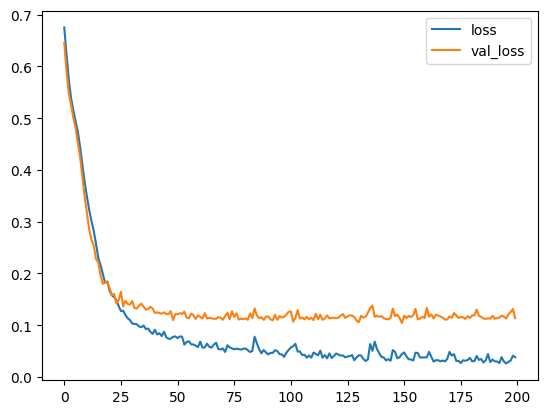

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

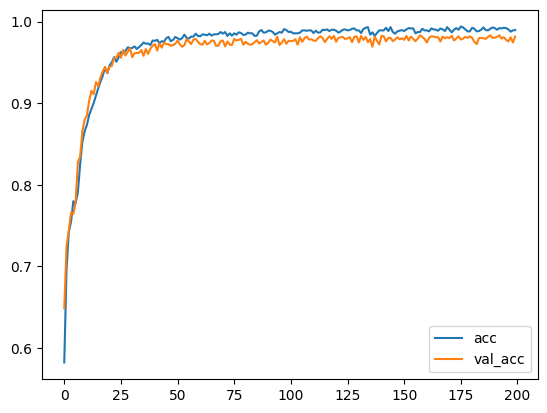

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# **Long Distance Problem**

In [12]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [13]:
input = np.expand_dims(X,-1)

i = tf.keras.layers.Input(shape=(T,D))
x = tf.keras.layers.SimpleRNN(5)(i)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(i , x)

model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

r = model.fit(
    input,Y,
    epochs = 200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4963 - loss: 0.7028 - val_accuracy: 0.5000 - val_loss: 0.6957
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4993 - loss: 0.6964 - val_accuracy: 0.5036 - val_loss: 0.6941
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4953 - loss: 0.6952 - val_accuracy: 0.4996 - val_loss: 0.6956
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5219 - loss: 0.6924 - val_accuracy: 0.5004 - val_loss: 0.6947
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4944 - loss: 0.6933 - val_accuracy: 0.4976 - val_loss: 0.6941
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5283 - loss: 0.6918 - val_accuracy: 0.5148 - val_loss: 0.6928
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5285 - loss: 0.6904 - val_accuracy: 0.5044 - val_loss: 0.6941
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5171 - loss: 0.6919 - val_accuracy: 0.5412 - 

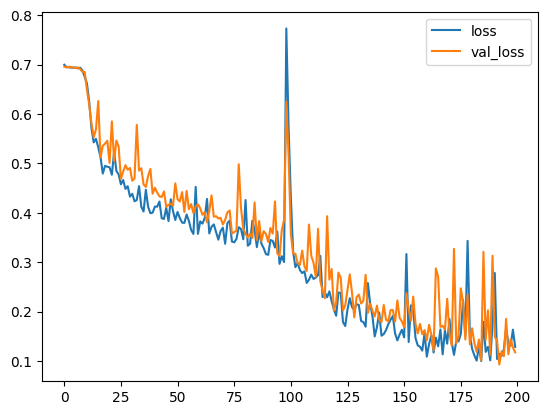

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

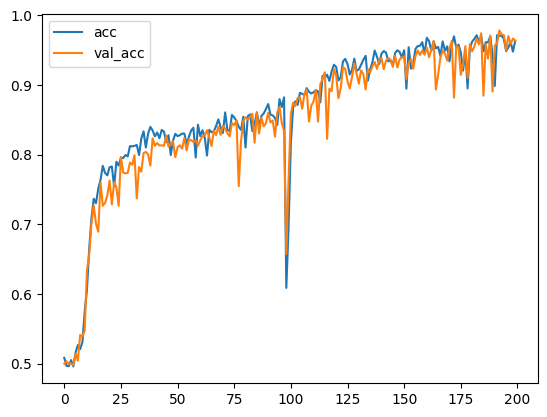

In [15]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#### **LSTM Network**

In [16]:
i = tf.keras.layers.Input(shape=(T,D))
x = tf.keras.layers.LSTM(5)(i)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(i , x)

model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

r = model.fit(
    input,Y,
    epochs = 200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5019 - loss: 0.6941 - val_accuracy: 0.4920 - val_loss: 0.6934
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5077 - loss: 0.6936 - val_accuracy: 0.4920 - val_loss: 0.6936
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5129 - loss: 0.6929 - val_accuracy: 0.5024 - val_loss: 0.6932
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5005 - loss: 0.6949 - val_accuracy: 0.4932 - val_loss: 0.6935
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4988 - loss: 0.6934 - val_accuracy: 0.4944 - val_loss: 0.6942
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4862 - loss: 0.6938 - val_accuracy: 0.4964 - val_loss: 0.6934
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4798 - loss: 0.6938 - val_accuracy: 0.5048 - val_loss: 0.6936
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4916 - loss: 0.6927 - val_accuracy: 0.5000 - 

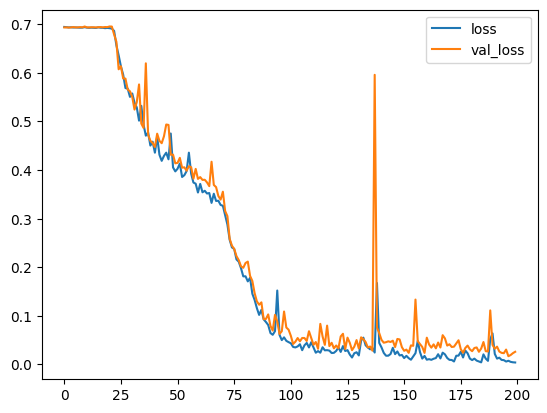

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

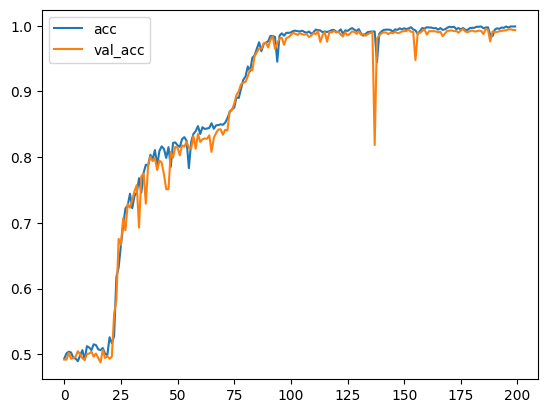

In [18]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# **More Harder Problem**

In [32]:
T = 15
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

#### **Simple RNN Network**

In [33]:
input = np.expand_dims(X,-1)

i = tf.keras.layers.Input(shape=(T,D))
x = tf.keras.layers.SimpleRNN(5)(i)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(i , x)

model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

r = model.fit(
    input,Y,
    epochs = 200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.4954 - loss: 0.7131 - val_accuracy: 0.5008 - val_loss: 0.6976
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5119 - loss: 0.6952 - val_accuracy: 0.4972 - val_loss: 0.6948
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5047 - loss: 0.6958 - val_accuracy: 0.5048 - val_loss: 0.6949
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5160 - loss: 0.6929 - val_accuracy: 0.5060 - val_loss: 0.6950
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4995 - loss: 0.6941 - val_accuracy: 0.5028 - val_loss: 0.6962
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5033 - loss: 0.6952 - val_accuracy: 0.4952 - val_loss: 0.6967
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5215 - loss: 0.6923 - val_accuracy: 0.5080 - val_loss: 0.6950
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5111 - loss: 0.6926 - val_accuracy: 0.4992 - 

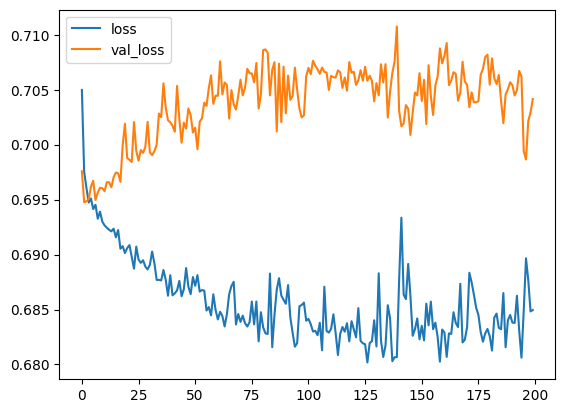

In [34]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

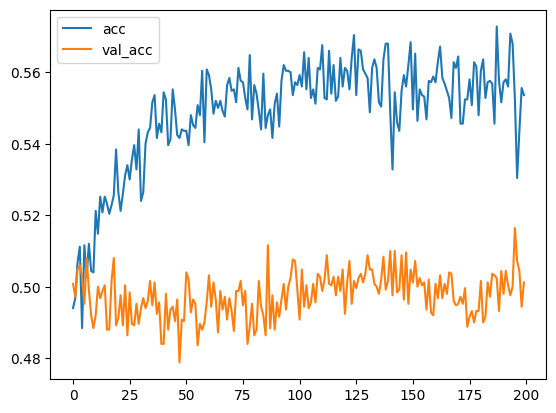

In [35]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#### **LSTM Network**

In [36]:
i = tf.keras.layers.Input(shape=(T,D))
x = tf.keras.layers.LSTM(10)(i)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(i , x)

model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

r = model.fit(
    input,Y,
    epochs = 200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5138 - loss: 0.6972 - val_accuracy: 0.5012 - val_loss: 0.6931
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5215 - loss: 0.6927 - val_accuracy: 0.5172 - val_loss: 0.6928
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5268 - loss: 0.6927 - val_accuracy: 0.5076 - val_loss: 0.6929
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5231 - loss: 0.6926 - val_accuracy: 0.5048 - val_loss: 0.6944
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5061 - loss: 0.6944 - val_accuracy: 0.5116 - val_loss: 0.6928
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5083 - loss: 0.6938 - val_accuracy: 0.5120 - val_loss: 0.6929
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4855 - loss: 0.6944 - val_accuracy: 0.5048 - val_loss: 0.6945
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5273 - loss: 0.6927 - val_accuracy: 0.5084 -

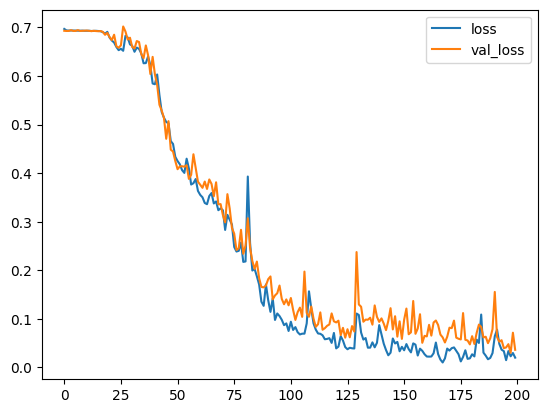

In [37]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

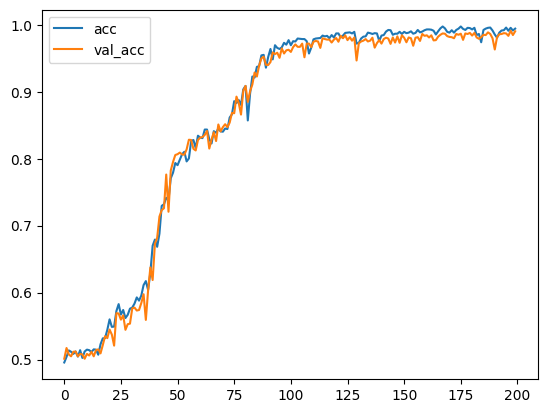

In [38]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#### **GRU Network Testing**

In [40]:
i = tf.keras.layers.Input(shape=(T,D))
x = tf.keras.layers.GRU(10)(i)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(i , x)

model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

r = model.fit(
    input,Y,
    epochs = 200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5100 - loss: 0.6963 - val_accuracy: 0.4908 - val_loss: 0.6938
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5030 - loss: 0.6945 - val_accuracy: 0.5144 - val_loss: 0.6934
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5285 - loss: 0.6929 - val_accuracy: 0.5040 - val_loss: 0.6936
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5084 - loss: 0.6929 - val_accuracy: 0.5044 - val_loss: 0.6932
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5037 - loss: 0.6938 - val_accuracy: 0.4932 - val_loss: 0.6934
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5108 - loss: 0.6930 - val_accuracy: 0.4940 - val_loss: 0.6936
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4916 - loss: 0.6934 - val_accuracy: 0.5052 - val_loss: 0.6936
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5035 - loss: 0.6927 - val_accuracy: 0.5084 - 

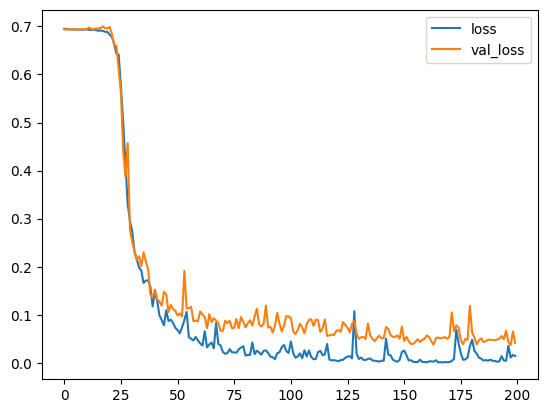

In [41]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

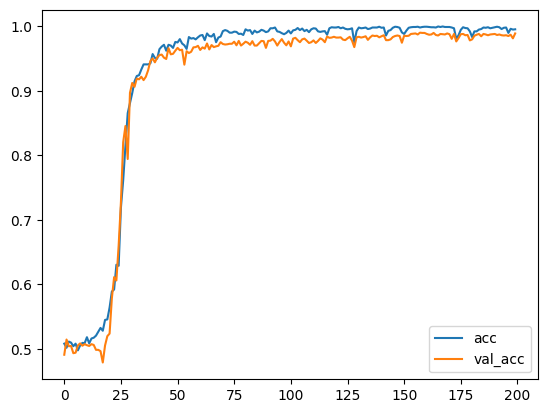

In [42]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# **Make it even More harder**

In [43]:
T = 25
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

#### **LSTM Network**

In [46]:
input = np.expand_dims(X,-1)

i = tf.keras.layers.Input(shape=(T,D))
x = tf.keras.layers.LSTM(5)(i)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(i , x)

model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

r = model.fit(
    input,Y,
    epochs = 200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5105 - loss: 0.6931 - val_accuracy: 0.5016 - val_loss: 0.6933
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5327 - loss: 0.6921 - val_accuracy: 0.5004 - val_loss: 0.6933
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5029 - loss: 0.6933 - val_accuracy: 0.4984 - val_loss: 0.6933
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4987 - loss: 0.6934 - val_accuracy: 0.5004 - val_loss: 0.6938
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5221 - loss: 0.6917 - val_accuracy: 0.4856 - val_loss: 0.6941
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5136 - loss: 0.6914 - val_accuracy: 0.4936 - val_loss: 0.6939
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5296 - loss: 0.6906 - val_accuracy: 0.4864 - val_loss: 0.6960
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5314 - loss: 0.6903 - val_accuracy: 0.4936 - v

##### **here we are reaching the limit of LSTM with simple approach**

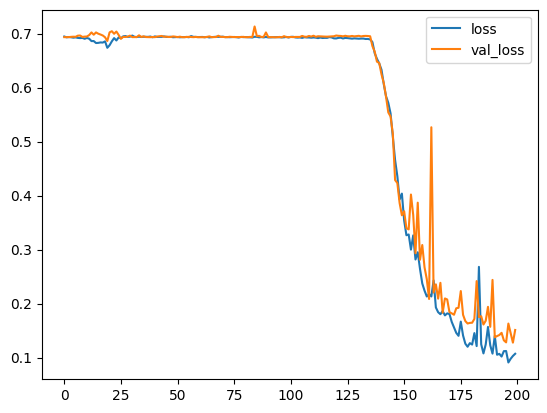

In [47]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

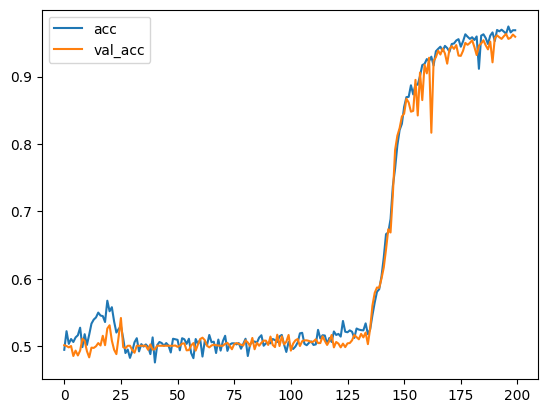

In [48]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#### **h_t sequence max pooling method with LSTM with higher threshold**

In [62]:
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [63]:
input = np.expand_dims(X,-1)

i = tf.keras.layers.Input(shape=(T,D))
x = tf.keras.layers.LSTM(5,return_sequences=True)(i)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(i , x)

model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

r = model.fit(
    input,Y,
    epochs = 200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4838 - loss: 0.6959 - val_accuracy: 0.5128 - val_loss: 0.6935
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5035 - loss: 0.6931 - val_accuracy: 0.5080 - val_loss: 0.6932
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4990 - loss: 0.6934 - val_accuracy: 0.5084 - val_loss: 0.6932
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4996 - loss: 0.6933 - val_accuracy: 0.5124 - val_loss: 0.6931
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4953 - loss: 0.6933 - val_accuracy: 0.5120 - val_loss: 0.6929
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5180 - loss: 0.6927 - val_accuracy: 0.5108 - val_loss: 0.6928
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5071 - loss: 0.6928 - val_accuracy: 0.5248 - val_loss: 0.6927
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5134 - loss: 0.6923 - val_accuracy: 0.4852 - 

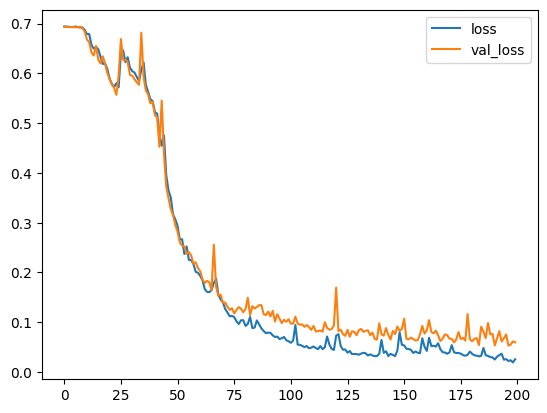

In [64]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

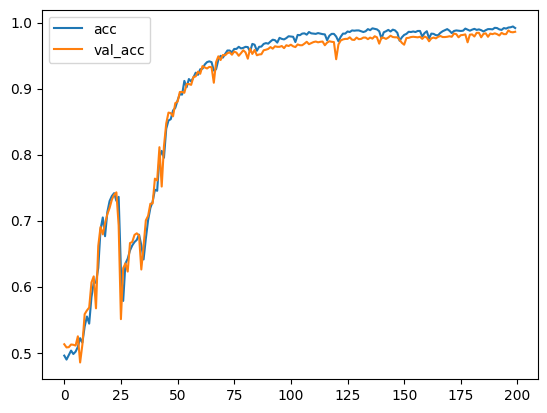

In [65]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# **What If the Sequence is Not Consequtive**

In [72]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 4, 9)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [76]:
input = np.expand_dims(X,-1)

i = tf.keras.layers.Input(shape=(T,D))
x = tf.keras.layers.LSTM(64,return_sequences=True)(i)
x = tf.keras.layers.LSTM(64)(i)
x = tf.keras.layers.Dense(32,activation='relu')(x)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(i , x)

model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

r = model.fit(
    input,Y,
    epochs = 100,
    validation_split=0.5
)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4873 - loss: 0.6969 - val_accuracy: 0.4896 - val_loss: 0.6949
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5031 - loss: 0.6932 - val_accuracy: 0.4932 - val_loss: 0.6940
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5107 - loss: 0.6932 - val_accuracy: 0.5180 - val_loss: 0.6926
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4984 - loss: 0.6943 - val_accuracy: 0.5244 - val_loss: 0.6927
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4851 - loss: 0.6952 - val_accuracy: 0.4900 - val_loss: 0.6941
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4960 - loss: 0.6936 - val_accuracy: 0.5188 - val_loss: 0.6930
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5246 - loss: 0.6922 - val_accuracy: 0.5124 - val_loss: 0.6925
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5416 - loss: 0.6938 - val_accuracy: 0.5028 -

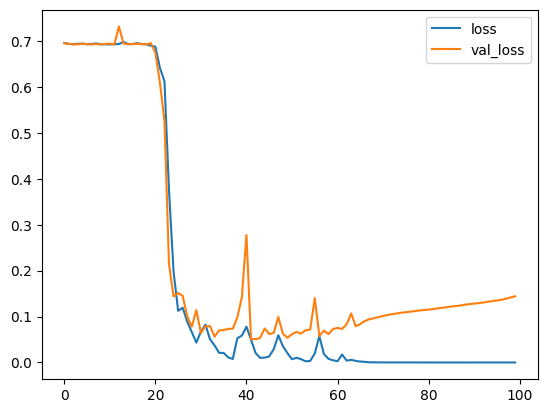

In [77]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

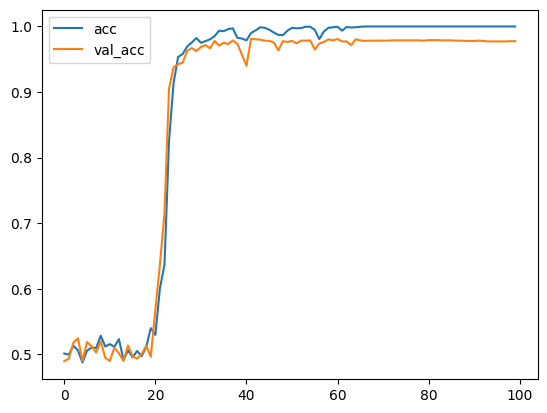

In [78]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()